In [1]:
import pandas as pd
allData = pd.read_pickle('Results\AllUnitData_MUA_multistim.pickle')

In [2]:
allData.head()

,channel_number,first_pulse_ratio,max_response,max_z,max_z_t,off_response,second_pulse_ratio,stable_response,summed_z,total_z_t,subject,genotype,location,penetration
0,3.0,0.039201,2.602041,"[2.6020411578961373, 0.10200161341483703, 0.10...",0.091581,-0.648010,0.039201,0.029593,"[3.6100571022309977, 0.012000189813510184, -0....",0.098292,HOM1,HOM,V1,Loc1
1,4.0,0.231862,8.539988,"[8.539987738693622, 1.9801001674566239, 0.3875...",0.125282,4.274165,0.045378,-0.011233,"[10.696787767895703, 2.0976472857851483, 0.648...",0.114426,HOM1,HOM,V1,Loc1
2,5.0,0.153074,6.011101,"[6.011100903653789, 0.9201434256534031, 0.5430...",0.114310,-0.116903,0.090339,0.047208,"[7.429026838267229, 1.9383349212534802, 0.9239...",0.133565,HOM1,HOM,V1,Loc1
3,6.0,0.183802,10.424794,"[10.424794363480121, 1.9160938941508747, 1.016...",0.122230,2.366073,0.097473,0.009182,"[13.998448560598405, 1.678832054140732, 1.5626...",0.116574,HOM1,HOM,V1,Loc1
4,7.0,0.183629,10.363741,"[10.363741397440362, 1.9030838943596269, 0.605...",0.119178,4.243866,0.058452,0.016273,"[13.350917539861403, 1.7733538126457222, 0.659...",0.112690,HOM1,HOM,V1,Loc1


# Look at max response

V1
(6.435723643731038, 1.7917984401791452e-09)
('mean_WT', 5.173850882098437)
('mean_HOM', 8.664618667829735)
LGN
(-2.365123051630047, 0.019286511040208114)
('mean_WT', 10.34659014373468)
('mean_HOM', 7.365119389153494)
S1
(0.5440149301599339, 0.5870897879287125)
('mean_WT', 8.677306887529314)
('mean_HOM', 9.08326128973677)
VPL/M
(3.035678493688449, 0.002762223282387759)
('mean_WT', 8.677306887529314)
('mean_HOM', 12.529226150095651)


Text(0.5,0.98,'Max_response')

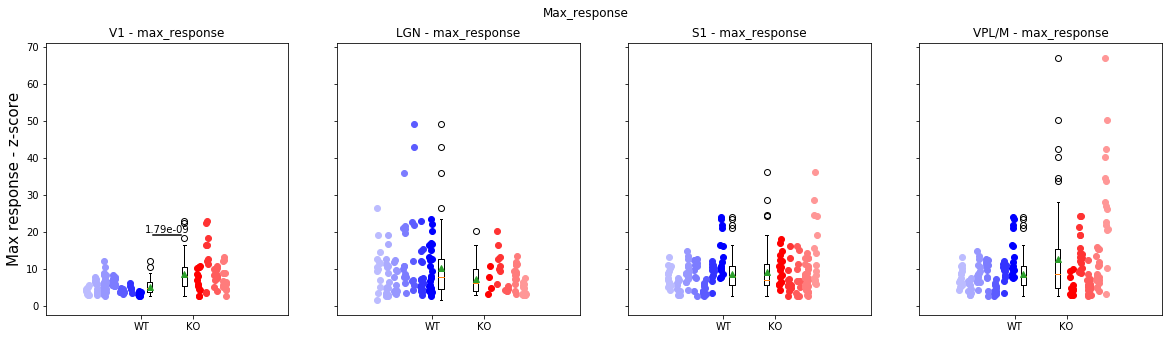

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from spike2_utils import lighten_color
           
fig,ax = plt.subplots(1,4,figsize=(20,5),sharey=True)
sig_thresh = 0.05/20
# max_response
# V1
hom_mr = allData.loc[(allData['location']=='V1') & (allData['genotype']=='HOM'),'max_response']
hom_sub = allData.loc[(allData['location']=='V1') & (allData['genotype']=='HOM'),'subject']
wt_mr = allData.loc[(allData['location']=='V1') & (allData['genotype']=='WT'),'max_response']
wt_sub = allData.loc[(allData['location']=='V1') & (allData['genotype']=='WT'),'subject']
curr_color = (0.,0.,1.)
for i,sub in enumerate(np.unique(wt_sub)):
    ax[0].scatter(0.9-0.25*(i+1)+0.1*np.random.rand(1,wt_mr[wt_sub==sub].size),wt_mr[wt_sub==sub],color=curr_color)
    curr_color=lighten_color(curr_color,amount=0.8)
curr_color = (1.,0.,0.)
for i,sub in enumerate(np.unique(hom_sub)):
    ax[0].scatter(2.1+0.25*(i+1)+0.1*np.random.rand(1,hom_mr[hom_sub==sub].size),hom_mr[hom_sub==sub],color=curr_color)
    curr_color=lighten_color(curr_color,amount=0.8)
ax[0].boxplot([wt_mr,hom_mr],showmeans=True)
ax[0].set_title('V1 - max_response')
ax[0].set_xlim([0,3])
(t,p) = stats.ttest_ind(hom_mr,wt_mr)
if p<sig_thresh:
    ylim = ax[0].get_ylim()
    ax[0].plot([1.1,1.9],[0.8*ylim[1],0.8*ylim[1]],'k')
    ax[0].text(1.5,0.8*ylim[1],'{0:0.2e}'.format(p),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
ax[0].set_xticks([0.75,2.25])
ax[0].set_xticklabels(['WT','KO'])
ax[0].set_xlim([-2,5])
ax[0].set_ylabel('Max response - z-score',fontsize=15)

print('V1')
print(t,p)
print('mean_WT',np.mean(wt_mr))
print('mean_HOM',np.mean(hom_mr))

# LGN
hom_mr = allData.loc[(allData['location']=='LGN') & (allData['genotype']=='HOM'),'max_response']
hom_sub = allData.loc[(allData['location']=='LGN') & (allData['genotype']=='HOM'),'subject']
wt_mr = allData.loc[(allData['location']=='LGN') & (allData['genotype']=='WT'),'max_response']
wt_sub = allData.loc[(allData['location']=='LGN') & (allData['genotype']=='WT'),'subject']
curr_color = (0.,0.,1.)
for i,sub in enumerate(np.unique(wt_sub)):
    ax[1].scatter(0.9-0.25*(i+1)+0.1*np.random.rand(1,wt_mr[wt_sub==sub].size),wt_mr[wt_sub==sub],color=curr_color)
    curr_color=lighten_color(curr_color,amount=0.8)
curr_color = (1.,0.,0.)
for i,sub in enumerate(np.unique(hom_sub)):
    ax[1].scatter(2.1+0.25*(i+1)+0.1*np.random.rand(1,hom_mr[hom_sub==sub].size),hom_mr[hom_sub==sub],color=curr_color)
    curr_color=lighten_color(curr_color,amount=0.8)
ax[1].boxplot([wt_mr,hom_mr],showmeans=True)
ax[1].set_title('LGN - max_response')
ax[1].set_xticks([0.75,2.25])
ax[1].set_xticklabels(['WT','KO'])
ax[1].set_xlim([-2,5])
(t,p) = stats.ttest_ind(hom_mr,wt_mr)
if p<sig_thresh:
    ylim = ax[1].get_ylim()
    ax[1].plot([1.1,1.9],[0.8*ylim[1],0.8*ylim[1]],'k')
    ax[1].text(1.5,0.8*ylim[1],'{0:0.2e}'.format(p),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
print('LGN')
print(t,p)
print('mean_WT',np.mean(wt_mr))
print('mean_HOM',np.mean(hom_mr))

# S1
hom_mr = allData.loc[(allData['location']=='S1') & (allData['genotype']=='HOM'),'max_response']
hom_sub = allData.loc[(allData['location']=='S1') & (allData['genotype']=='HOM'),'subject']
wt_mr = allData.loc[(allData['location']=='S1') & (allData['genotype']=='WT'),'max_response']
wt_sub = allData.loc[(allData['location']=='S1') & (allData['genotype']=='WT'),'subject']
curr_color = (0.,0.,1.)
for i,sub in enumerate(np.unique(wt_sub)):
    ax[2].scatter(0.9-0.25*(i+1)+0.1*np.random.rand(1,wt_mr[wt_sub==sub].size),wt_mr[wt_sub==sub],color=curr_color)
    curr_color=lighten_color(curr_color,amount=0.8)
curr_color = (1.,0.,0.)
for i,sub in enumerate(np.unique(hom_sub)):
    ax[2].scatter(2.1+0.25*(i+1)+0.1*np.random.rand(1,hom_mr[hom_sub==sub].size),hom_mr[hom_sub==sub],color=curr_color)
    curr_color=lighten_color(curr_color,amount=0.8)
ax[2].boxplot([wt_mr,hom_mr],showmeans=True)
ax[2].set_title('S1 - max_response')
ax[2].set_xticks([0.75,2.25])
ax[2].set_xticklabels(['WT','KO'])
ax[2].set_xlim([-2,5])
(t,p) = stats.ttest_ind(hom_mr,wt_mr)
if p<sig_thresh:
    ylim = ax[2].get_ylim()
    ax[2].plot([1.1,1.9],[0.8*ylim[1],0.8*ylim[1]],'k')
    ax[2].text(1.5,0.8*ylim[1],'{0:0.2e}'.format(p),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
print('S1')
print(t,p)
print('mean_WT',np.mean(wt_mr))
print('mean_HOM',np.mean(hom_mr))

# VPLM
hom_mr = allData.loc[(allData['location']=='VPLM') & (allData['genotype']=='HOM'),'max_response']
hom_sub = allData.loc[(allData['location']=='VPLM') & (allData['genotype']=='HOM'),'subject']
wt_mr = allData.loc[(allData['location']=='VPLM') & (allData['genotype']=='WT'),'max_response']
wt_sub = allData.loc[(allData['location']=='VPLM') & (allData['genotype']=='WT'),'subject']
curr_color = (0.,0.,1.)
for i,sub in enumerate(np.unique(wt_sub)):
    ax[3].scatter(0.9-0.25*(i+1)+0.1*np.random.rand(1,wt_mr[wt_sub==sub].size),wt_mr[wt_sub==sub],color=curr_color)
    curr_color=lighten_color(curr_color,amount=0.8)
curr_color = (1.,0.,0.)
for i,sub in enumerate(np.unique(hom_sub)):
    ax[3].scatter(2.1+0.25*(i+1)+0.1*np.random.rand(1,hom_mr[hom_sub==sub].size),hom_mr[hom_sub==sub],color=curr_color)
    curr_color=lighten_color(curr_color,amount=0.8)
ax[3].boxplot([wt_mr,hom_mr],showmeans=True)
ax[3].set_title('VPL/M - max_response')
ax[3].set_xticks([0.75,2.25])
ax[3].set_xticklabels(['WT','KO'])
ax[3].set_xlim([-2,5])
(t,p) = stats.ttest_ind(hom_mr,wt_mr)
if p<sig_thresh:
    ylim = ax[3].get_ylim()
    ax[3].plot([1.1,1.9],[0.8*ylim[1],0.8*ylim[1]],'k')
    ax[3].text(1.5,0.8*ylim[1],'{0:0.2e}'.format(p),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
print('VPL/M')
print(t,p)
print('mean_WT',np.mean(wt_mr))
print('mean_HOM',np.mean(hom_mr))

fig.suptitle('Max_response')

# Time constant

V1
(-2.35784024478267, 0.019755512417243326)
('mean_WT', 0.17969328111375799)
('mean_HOM', 0.12167913801607752)
LGN
(-0.6080363656755274, 0.5440707977646451)
('mean_WT', 0.27762819501660263)
('mean_HOM', 0.2421863753185198)
S1
(6.599599978774475, 4.312824384020512e-10)
('mean_WT', 0.18347200315153164)
('mean_HOM', 0.5389196079924753)
VPL/M
(7.042209430327668, 4.0903467738895006e-11)
('mean_WT', 0.18347200315153164)
('mean_HOM', 0.7588827870697253)
()
()
Per animal analysis - time constant
S1(s)
(-2.2156990188863563, 0.05106533337602744)
('mean_WT', 0.17931049502281776)
('mean_HOM', 0.6109135992907897)
VPL/M(s)
(-3.166842430885273, 0.010041373244463072)
('mean_WT', 0.17931049502281776)
('mean_HOM', 0.7223501108710245)


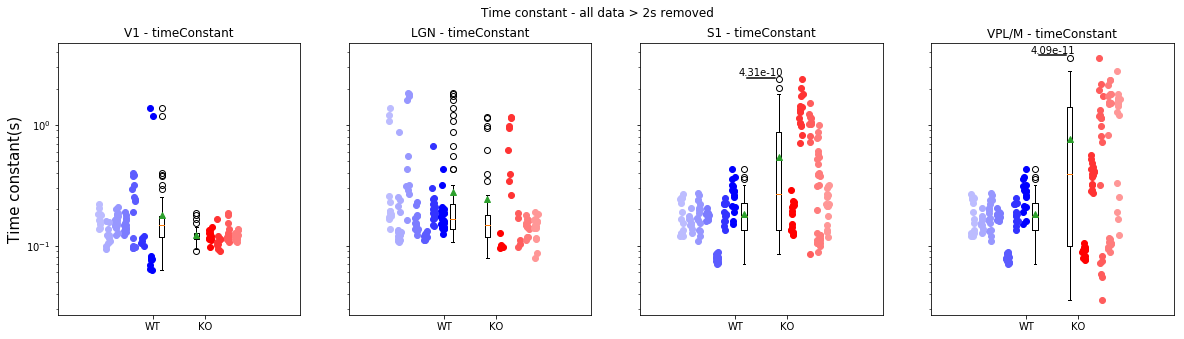

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
                      
fig,ax = plt.subplots(1,4,figsize=(20,5),sharey=True)

# max_response
# V1
hom_mr = allData.loc[(allData['location']=='V1') & (allData['genotype']=='HOM'),'total_z_t']
hom_sub = allData.loc[(allData['location']=='V1') & (allData['genotype']=='HOM'),'subject']
which = hom_mr<10.
hom_mr = hom_mr[which]
hom_sub = hom_sub[which]
wt_mr = allData.loc[(allData['location']=='V1') & (allData['genotype']=='WT'),'total_z_t']
wt_sub = allData.loc[(allData['location']=='V1') & (allData['genotype']=='WT'),'subject']
which = wt_mr<10.
wt_mr = wt_mr[which]
wt_sub = wt_sub[which]
curr_color = (0.,0.,1.)
for i,sub in enumerate(np.unique(wt_sub)):
    ax[0].scatter(0.9-0.25*(i+1)+0.1*np.random.rand(1,wt_mr[wt_sub==sub].size),wt_mr[wt_sub==sub],color=curr_color)
    curr_color=lighten_color(curr_color,amount=0.8)
curr_color = (1.,0.,0.)
for i,sub in enumerate(np.unique(hom_sub)):
    ax[0].scatter(2.1+0.25*(i+1)+0.1*np.random.rand(1,hom_mr[hom_sub==sub].size),hom_mr[hom_sub==sub],color=curr_color)
    curr_color=lighten_color(curr_color,amount=0.8)
ax[0].boxplot([wt_mr,hom_mr],showmeans=True)
ax[0].set_title('V1 - timeConstant')
ax[0].set_xticks([0.75,2.25])
ax[0].set_xticklabels(['WT','KO'])
ax[0].set_xlim([0,3])
ax[0].set_ylabel('Time constant(s)',fontsize=15)
ax[0].set_yscale('log')
(t,p) = stats.ttest_ind(hom_mr,wt_mr)
if p<sig_thresh:
    ylim = ax[0].get_ylim()
    ax[0].plot([1.1,1.9],[0.8*ylim[1],0.8*ylim[1]],'k')
    ax[0].text(1.5,0.8*ylim[1],'{0:0.2e}'.format(p),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
ax[0].set_xlim([-2,5])
print('V1')
print(t,p)
print('mean_WT',np.mean(wt_mr))
print('mean_HOM',np.mean(hom_mr))

# LGN
hom_mr = allData.loc[(allData['location']=='LGN') & (allData['genotype']=='HOM'),'total_z_t']
hom_sub = allData.loc[(allData['location']=='LGN') & (allData['genotype']=='HOM'),'subject']
which = hom_mr<10.
hom_mr = hom_mr[which]
hom_sub = hom_sub[which]
wt_mr = allData.loc[(allData['location']=='LGN') & (allData['genotype']=='WT'),'total_z_t']
wt_sub = allData.loc[(allData['location']=='LGN') & (allData['genotype']=='WT'),'subject']
which = wt_mr<10.
wt_mr = wt_mr[which]
wt_sub = wt_sub[which]
curr_color = (0.,0.,1.)
for i,sub in enumerate(np.unique(wt_sub)):
    ax[1].scatter(0.9-0.25*(i+1)+0.1*np.random.rand(1,wt_mr[wt_sub==sub].size),wt_mr[wt_sub==sub],color=curr_color)
    curr_color=lighten_color(curr_color,amount=0.8)
curr_color = (1.,0.,0.)
for i,sub in enumerate(np.unique(hom_sub)):
    ax[1].scatter(2.1+0.25*(i+1)+0.1*np.random.rand(1,hom_mr[hom_sub==sub].size),hom_mr[hom_sub==sub],color=curr_color)
    curr_color=lighten_color(curr_color,amount=0.8)
ax[1].boxplot([wt_mr,hom_mr],showmeans=True)
ax[1].set_title('LGN - timeConstant')
ax[1].set_xticks([0.75,2.25])
ax[1].set_xticklabels(['WT','KO'])
ax[1].set_xlim([-2,5])
(t,p) = stats.ttest_ind(hom_mr,wt_mr)
if p<sig_thresh:
    ylim = ax[1].get_ylim()
    ax[1].plot([1.1,1.9],[0.8*ylim[1],0.8*ylim[1]],'k')
    ax[1].text(1.5,0.8*ylim[1],'{0:0.2e}'.format(p),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
print('LGN')
print(t,p)
print('mean_WT',np.mean(wt_mr))
print('mean_HOM',np.mean(hom_mr))

# S1
hom_mr = allData.loc[(allData['location']=='S1') & (allData['genotype']=='HOM'),'total_z_t']
hom_sub = allData.loc[(allData['location']=='S1') & (allData['genotype']=='HOM'),'subject']
which = hom_mr<10.
hom_mr = hom_mr[which]
hom_sub = hom_sub[which]
wt_mr = allData.loc[(allData['location']=='S1') & (allData['genotype']=='WT'),'total_z_t']
wt_sub = allData.loc[(allData['location']=='S1') & (allData['genotype']=='WT'),'subject']
which = wt_mr<10.
wt_mr = wt_mr[which]
wt_sub = wt_sub[which]
curr_color = (0.,0.,1.)
s1_wt_tc = []
for i,sub in enumerate(np.unique(wt_sub)):
    ax[2].scatter(0.9-0.25*(i+1)+0.1*np.random.rand(1,wt_mr[wt_sub==sub].size),wt_mr[wt_sub==sub],color=curr_color)
    curr_color=lighten_color(curr_color,amount=0.8)
    s1_wt_tc.append(np.mean(wt_mr[wt_sub==sub]))
    
curr_color = (1.,0.,0.)
s1_hom_tc = []
for i,sub in enumerate(np.unique(hom_sub)):
    ax[2].scatter(2.1+0.25*(i+1)+0.1*np.random.rand(1,hom_mr[hom_sub==sub].size),hom_mr[hom_sub==sub],color=curr_color)
    curr_color=lighten_color(curr_color,amount=0.8)
    s1_hom_tc.append(np.mean(hom_mr[hom_sub==sub]))
    
ax[2].boxplot([wt_mr,hom_mr],showmeans=True)
ax[2].set_title('S1 - timeConstant')
ax[2].set_xticks([0.75,2.25])
ax[2].set_xticklabels(['WT','KO'])
ax[2].set_xlim([-2,5])
(t,p) = stats.ttest_ind(hom_mr,wt_mr)
if p<sig_thresh:
    ylim = ax[2].get_ylim()
    ax[2].plot([1.1,1.9],[0.8*ylim[1],0.8*ylim[1]],'k')
    ax[2].text(1.5,0.8*ylim[1],'{0:0.2e}'.format(p),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
print('S1')
print(t,p)
print('mean_WT',np.mean(wt_mr))
print('mean_HOM',np.mean(hom_mr))

# VPLM
hom_mr = allData.loc[(allData['location']=='VPLM') & (allData['genotype']=='HOM'),'total_z_t']
hom_sub = allData.loc[(allData['location']=='VPLM') & (allData['genotype']=='HOM'),'subject']
which = hom_mr<10.
hom_mr = hom_mr[which]
hom_sub = hom_sub[which]
wt_mr = allData.loc[(allData['location']=='VPLM') & (allData['genotype']=='WT'),'total_z_t']
wt_sub = allData.loc[(allData['location']=='VPLM') & (allData['genotype']=='WT'),'subject']
which = wt_mr<10.
wt_mr = wt_mr[which]
wt_sub = wt_sub[which]
curr_color = (0.,0.,1.)
vplm_wt_tc = []
for i,sub in enumerate(np.unique(wt_sub)):
    ax[3].scatter(0.9-0.25*(i+1)+0.1*np.random.rand(1,wt_mr[wt_sub==sub].size),wt_mr[wt_sub==sub],color=curr_color)
    curr_color=lighten_color(curr_color,amount=0.8)
    vplm_wt_tc.append(np.mean(wt_mr[wt_sub==sub]))
    
curr_color = (1.,0.,0.)
vplm_hom_tc = []
for i,sub in enumerate(np.unique(hom_sub)):
    ax[3].scatter(2.1+0.25*(i+1)+0.1*np.random.rand(1,hom_mr[hom_sub==sub].size),hom_mr[hom_sub==sub],color=curr_color)
    curr_color=lighten_color(curr_color,amount=0.8)
    vplm_hom_tc.append(np.mean(hom_mr[hom_sub==sub]))
    
ax[3].boxplot([wt_mr,hom_mr],showmeans=True)
ax[3].set_title('VPL/M - timeConstant')
ax[3].set_xticks([0.75,2.25])
ax[3].set_xticklabels(['WT','KO'])
ax[3].set_xlim([-2,5])
(t,p) = stats.ttest_ind(hom_mr,wt_mr)
if p<sig_thresh:
    ylim = ax[3].get_ylim()
    ax[3].plot([1.1,1.9],[0.8*ylim[1],0.8*ylim[1]],'k')
    ax[3].text(1.5,0.8*ylim[1],'{0:0.2e}'.format(p),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
print('VPL/M')
print(t,p)
print('mean_WT',np.mean(wt_mr))
print('mean_HOM',np.mean(hom_mr))

fig.suptitle('Time constant - all data > 2s removed')


print()
print()
print('Per animal analysis - time constant')
(t,p) = stats.ttest_ind(np.asarray(s1_wt_tc),np.asarray(s1_hom_tc))
print('S1(s)')
print(t,p)
print('mean_WT',np.mean(np.asarray(s1_wt_tc)))
print('mean_HOM',np.mean(np.asarray(s1_hom_tc)))

(t,p) = stats.ttest_ind(np.asarray(vplm_wt_tc),np.asarray(vplm_hom_tc))
print('VPL/M(s)')
print(t,p)
print('mean_WT',np.mean(np.asarray(vplm_wt_tc)))
print('mean_HOM',np.mean(np.asarray(vplm_hom_tc)))


# stable response

V1
(-3.3238117997589827, 0.0011516281217269714)
('mean_WT', 0.05782760721109737)
('mean_HOM', 0.030594372579889277)
LGN
(0.32403290117852557, 0.7463706006014605)
('mean_WT', 0.1869199231365059)
('mean_HOM', 0.19995499169748357)
S1
(3.508228517625278, 0.0005683503922262508)
('mean_WT', 0.06309722084692994)
('mean_HOM', 0.13896079639873207)
VPL/M
(8.473940665510222, 9.737495962455889e-15)
('mean_WT', 0.06309722084692994)
('mean_HOM', 0.1908559454151832)


Text(0.5,0.98,'Stable responses - average of last 5 responses/max response ')

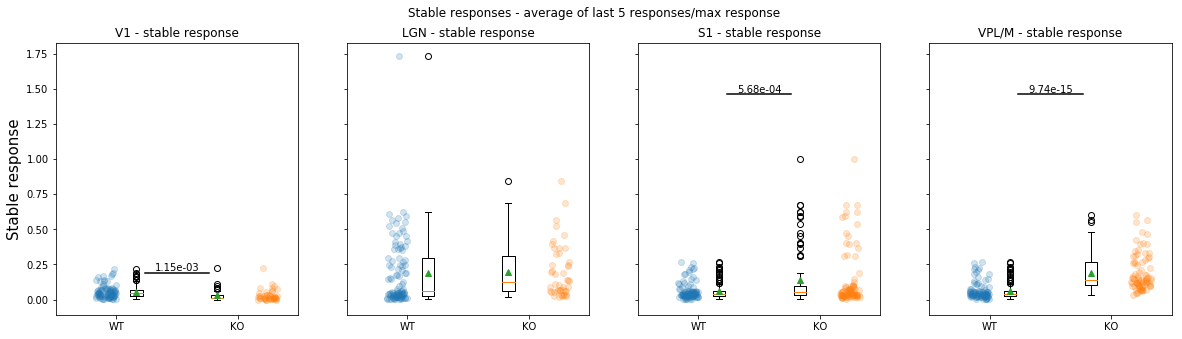

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
                      
fig,ax = plt.subplots(1,4,figsize=(20,5),sharey=True)

# max_response
# V1
hom_mr = allData.loc[(allData['location']=='V1') & (allData['genotype']=='HOM'),'stable_response']
wt_mr = allData.loc[(allData['location']=='V1') & (allData['genotype']=='WT'),'stable_response']
hom_mr = hom_mr[hom_mr>0.]
wt_mr = wt_mr[wt_mr>0.]
ax[0].scatter(0.5+0.25*np.random.rand(1,wt_mr.size),wt_mr,alpha=0.2)
ax[0].scatter(2.5+0.25*np.random.rand(1,hom_mr.size),hom_mr,alpha=0.2)
ax[0].boxplot([wt_mr,hom_mr],showmeans=True)
ax[0].set_title('V1 - stable response')
ax[0].set_xticks([0.75,2.25])
ax[0].set_xticklabels(['WT','KO'])
ax[0].set_ylabel('Stable response',fontsize=15)

ax[0].set_xlim([0,3])
(t,p) = stats.ttest_ind(hom_mr,wt_mr)
if p<sig_thresh:
    ylim = ax[0].get_ylim()
    ax[0].plot([1.1,1.9],[0.8*ylim[1],0.8*ylim[1]],'k')
    ax[0].text(1.5,0.8*ylim[1],'{0:0.2e}'.format(p),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
ax[0].set_xlim([0,3])
print('V1')
print(t,p)
print('mean_WT',np.mean(wt_mr))
print('mean_HOM',np.mean(hom_mr))

# LGN
hom_mr = allData.loc[(allData['location']=='LGN') & (allData['genotype']=='HOM'),'stable_response']
wt_mr = allData.loc[(allData['location']=='LGN') & (allData['genotype']=='WT'),'stable_response']
hom_mr = hom_mr[hom_mr>0.]
wt_mr = wt_mr[wt_mr>0.]
ax[1].scatter(0.5+0.25*np.random.rand(1,wt_mr.size),wt_mr,alpha=0.2)
ax[1].scatter(2.5+0.25*np.random.rand(1,hom_mr.size),hom_mr,alpha=0.2)
ax[1].boxplot([wt_mr,hom_mr],showmeans=True)
ax[1].set_title('LGN - stable response')
ax[1].set_xticks([0.75,2.25])
ax[1].set_xticklabels(['WT','KO'])
ax[1].set_xlim([0,3])
(t,p) = stats.ttest_ind(hom_mr,wt_mr)
if p<sig_thresh:
    ylim = ax[1].get_ylim()
    ax[1].plot([1.1,1.9],[0.8*ylim[1],0.8*ylim[1]],'k')
    ax[1].text(1.5,0.8*ylim[1],'{0:0.2e}'.format(p),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
print('LGN')
print(t,p)
print('mean_WT',np.mean(wt_mr))
print('mean_HOM',np.mean(hom_mr))

# S1
hom_mr = allData.loc[(allData['location']=='S1') & (allData['genotype']=='HOM'),'stable_response']
wt_mr = allData.loc[(allData['location']=='S1') & (allData['genotype']=='WT'),'stable_response']
hom_mr = hom_mr[hom_mr>0.]
wt_mr = wt_mr[wt_mr>0.]
ax[2].scatter(0.5+0.25*np.random.rand(1,wt_mr.size),wt_mr,alpha=0.2)
ax[2].scatter(2.5+0.25*np.random.rand(1,hom_mr.size),hom_mr,alpha=0.2)
ax[2].boxplot([wt_mr,hom_mr],showmeans=True)
ax[2].set_title('S1 - stable response')
ax[2].set_xticks([0.75,2.25])
ax[2].set_xticklabels(['WT','KO'])
ax[2].set_xlim([0,3])
(t,p) = stats.ttest_ind(hom_mr,wt_mr)
if p<sig_thresh:
    ylim = ax[2].get_ylim()
    ax[2].plot([1.1,1.9],[0.8*ylim[1],0.8*ylim[1]],'k')
    ax[2].text(1.5,0.8*ylim[1],'{0:0.2e}'.format(p),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
print('S1')
print(t,p)
print('mean_WT',np.mean(wt_mr))
print('mean_HOM',np.mean(hom_mr))

# VPLM
hom_mr = allData.loc[(allData['location']=='VPLM') & (allData['genotype']=='HOM'),'stable_response']
wt_mr = allData.loc[(allData['location']=='VPLM') & (allData['genotype']=='WT'),'stable_response']
hom_mr = hom_mr[hom_mr>0.]
wt_mr = wt_mr[wt_mr>0.]
ax[3].scatter(0.5+0.25*np.random.rand(1,wt_mr.size),wt_mr,alpha=0.2)
ax[3].scatter(2.5+0.25*np.random.rand(1,hom_mr.size),hom_mr,alpha=0.2)
ax[3].boxplot([wt_mr,hom_mr],showmeans=True)
ax[3].set_title('VPL/M - stable response')
ax[3].set_xticks([0.75,2.25])
ax[3].set_xticklabels(['WT','KO'])
ax[3].set_xlim([0,3])
(t,p) = stats.ttest_ind(hom_mr,wt_mr)
if p<sig_thresh:
    ylim = ax[3].get_ylim()
    ax[3].plot([1.1,1.9],[0.8*ylim[1],0.8*ylim[1]],'k')
    ax[3].text(1.5,0.8*ylim[1],'{0:0.2e}'.format(p),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
print('VPL/M')
print(t,p)
print('mean_WT',np.mean(wt_mr))
print('mean_HOM',np.mean(hom_mr))

fig.suptitle('Stable responses - average of last 5 responses/max response ')

# post-stim response

V1
(-1.930090634754319, 0.055603275803594254)
('mean_WT', 6.183370332791993)
('mean_HOM', 4.483230412514686)
LGN
(2.20699819244523, 0.028813488817991246)
('mean_WT', 1.0428221667504514)
('mean_HOM', 3.8852746482865275)
S1
(1.3304021028718807, 0.18503233948743378)
('mean_WT', 0.33496917022766204)
('mean_HOM', 1.0054272711055865)
VPL/M
(-1.427371308602922, 0.1552347141631742)
('mean_WT', 0.33496917022766204)
('mean_HOM', -0.3484162939898495)


Text(0.5,0.98,'Off response - z-score')

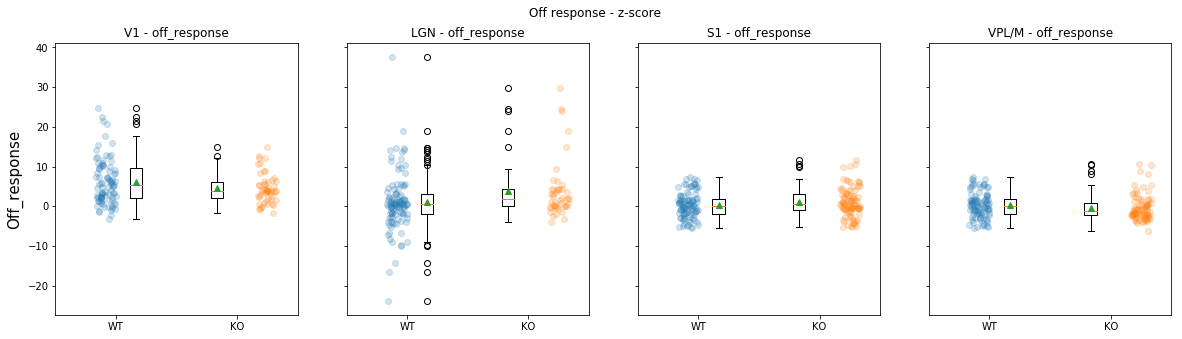

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
                      
fig,ax = plt.subplots(1,4,figsize=(20,5),sharey=True)

# max_response
# V1
hom_mr = allData.loc[(allData['location']=='V1') & (allData['genotype']=='HOM'),'off_response']
wt_mr = allData.loc[(allData['location']=='V1') & (allData['genotype']=='WT'),'off_response']
ax[0].scatter(0.5+0.25*np.random.rand(1,wt_mr.size),wt_mr,alpha=0.2)
ax[0].scatter(2.5+0.25*np.random.rand(1,hom_mr.size),hom_mr,alpha=0.2)
ax[0].boxplot([wt_mr,hom_mr],showmeans=True)
ax[0].set_title('V1 - off_response')
ax[0].set_xticks([0.75,2.25])
ax[0].set_xticklabels(['WT','KO'])
ax[0].set_ylabel('Off_response',fontsize=15)

ax[0].set_xlim([0,3])
(t,p) = stats.ttest_ind(hom_mr,wt_mr)
if p<sig_thresh:
    ylim = ax[0].get_ylim()
    ax[0].plot([1.1,1.9],[0.8*ylim[1],0.8*ylim[1]],'k')
    ax[0].text(1.5,0.8*ylim[1],'{0:0.2e}'.format(p),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
ax[0].set_xlim([0,3])
print('V1')
print(t,p)
print('mean_WT',np.mean(wt_mr))
print('mean_HOM',np.mean(hom_mr))

# LGN
hom_mr = allData.loc[(allData['location']=='LGN') & (allData['genotype']=='HOM'),'off_response']
wt_mr = allData.loc[(allData['location']=='LGN') & (allData['genotype']=='WT'),'off_response']
ax[1].scatter(0.5+0.25*np.random.rand(1,wt_mr.size),wt_mr,alpha=0.2)
ax[1].scatter(2.5+0.25*np.random.rand(1,hom_mr.size),hom_mr,alpha=0.2)
ax[1].boxplot([wt_mr,hom_mr],showmeans=True)
ax[1].set_title('LGN - off_response')
ax[1].set_xticks([0.75,2.25])
ax[1].set_xticklabels(['WT','KO'])
ax[1].set_xlim([0,3])
(t,p) = stats.ttest_ind(hom_mr,wt_mr)
if p<sig_thresh:
    ylim = ax[1].get_ylim()
    ax[1].plot([1.1,1.9],[0.8*ylim[1],0.8*ylim[1]],'k')
    ax[1].text(1.5,0.8*ylim[1],'{0:0.2e}'.format(p),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
print('LGN')
print(t,p)
print('mean_WT',np.mean(wt_mr))
print('mean_HOM',np.mean(hom_mr))

# S1
hom_mr = allData.loc[(allData['location']=='S1') & (allData['genotype']=='HOM'),'off_response']
wt_mr = allData.loc[(allData['location']=='S1') & (allData['genotype']=='WT'),'off_response']
ax[2].scatter(0.5+0.25*np.random.rand(1,wt_mr.size),wt_mr,alpha=0.2)
ax[2].scatter(2.5+0.25*np.random.rand(1,hom_mr.size),hom_mr,alpha=0.2)
ax[2].boxplot([wt_mr,hom_mr],showmeans=True)
ax[2].set_title('S1 - off_response')
ax[2].set_xticks([0.75,2.25])
ax[2].set_xticklabels(['WT','KO'])
ax[2].set_xlim([0,3])
(t,p) = stats.ttest_ind(hom_mr,wt_mr)
if p<sig_thresh:
    ylim = ax[2].get_ylim()
    ax[2].plot([1.1,1.9],[0.8*ylim[1],0.8*ylim[1]],'k')
    ax[2].text(1.5,0.8*ylim[1],'{0:0.2e}'.format(p),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
print('S1')
print(t,p)
print('mean_WT',np.mean(wt_mr))
print('mean_HOM',np.mean(hom_mr))

# VPLM
hom_mr = allData.loc[(allData['location']=='VPLM') & (allData['genotype']=='HOM'),'off_response']
wt_mr = allData.loc[(allData['location']=='VPLM') & (allData['genotype']=='WT'),'off_response']
ax[3].scatter(0.5+0.25*np.random.rand(1,wt_mr.size),wt_mr,alpha=0.2)
ax[3].scatter(2.5+0.25*np.random.rand(1,hom_mr.size),hom_mr,alpha=0.2)
ax[3].boxplot([wt_mr,hom_mr],showmeans=True)
ax[3].set_title('VPL/M - off_response')
ax[3].set_xticks([0.75,2.25])
ax[3].set_xticklabels(['WT','KO'])
ax[3].set_xlim([0,3])
(t,p) = stats.ttest_ind(hom_mr,wt_mr)
if p<sig_thresh:
    ylim = ax[3].get_ylim()
    ax[3].plot([1.1,1.9],[0.8*ylim[1],0.8*ylim[1]],'k')
    ax[3].text(1.5,0.8*ylim[1],'{0:0.2e}'.format(p),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
print('VPL/M')
print(t,p)
print('mean_WT',np.mean(wt_mr))
print('mean_HOM',np.mean(hom_mr))

fig.suptitle('Off response - z-score')

# normalized z-scores

V1
(-3.036345477427291, 0.0028531648371294886)
('mean_WT', 1.1903171595340574)
('mean_HOM', 0.7031666205499987)
LGN
(2.728568418088028, 0.007110976308784338)
('mean_WT', 0.048093064990555184)
('mean_HOM', 0.393694539581642)
S1
(1.6065580783444715, 0.10986608366843759)
('mean_WT', 0.031600019046520496)
('mean_HOM', 0.13099073099019984)
VPL/M
(-0.06326525305628325, 0.9496266728013962)
('mean_WT', 0.031600019046520496)
('mean_HOM', 0.027264560498757046)


Text(0.5,0.98,'Off response - Normalized z-score')

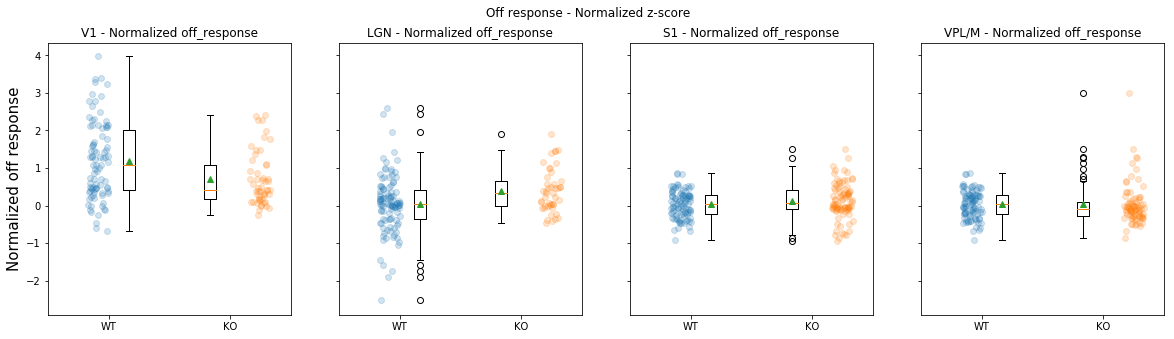

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
                      
fig,ax = plt.subplots(1,4,figsize=(20,5),sharey=True)

# max_response
# V1
hom_mr = allData.loc[(allData['location']=='V1') & (allData['genotype']=='HOM'),'off_response']/allData.loc[(allData['location']=='V1') & (allData['genotype']=='HOM'),'max_response']
wt_mr = allData.loc[(allData['location']=='V1') & (allData['genotype']=='WT'),'off_response']/allData.loc[(allData['location']=='V1') & (allData['genotype']=='WT'),'max_response']
ax[0].scatter(0.5+0.25*np.random.rand(1,wt_mr.size),wt_mr,alpha=0.2)
ax[0].scatter(2.5+0.25*np.random.rand(1,hom_mr.size),hom_mr,alpha=0.2)
ax[0].boxplot([wt_mr,hom_mr],showmeans=True)
ax[0].set_title('V1 - Normalized off_response')
ax[0].set_xticks([0.75,2.25])
ax[0].set_xticklabels(['WT','KO'])
ax[0].set_ylabel('Normalized off response',fontsize=15)

ax[0].set_xlim([0,3])
(t,p) = stats.ttest_ind(hom_mr,wt_mr)
if p<sig_thresh:
    ylim = ax[0].get_ylim()
    ax[0].plot([1.1,1.9],[0.8*ylim[1],0.8*ylim[1]],'k')
    ax[0].text(1.5,0.8*ylim[1],'{0:0.2e}'.format(p),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
ax[0].set_xlim([0,3])
print('V1')
print(t,p)
print('mean_WT',np.mean(wt_mr))
print('mean_HOM',np.mean(hom_mr))

# LGN
hom_mr = allData.loc[(allData['location']=='LGN') & (allData['genotype']=='HOM'),'off_response']/allData.loc[(allData['location']=='LGN') & (allData['genotype']=='HOM'),'max_response']
wt_mr = allData.loc[(allData['location']=='LGN') & (allData['genotype']=='WT'),'off_response']/allData.loc[(allData['location']=='LGN') & (allData['genotype']=='WT'),'max_response']
ax[1].scatter(0.5+0.25*np.random.rand(1,wt_mr.size),wt_mr,alpha=0.2)
ax[1].scatter(2.5+0.25*np.random.rand(1,hom_mr.size),hom_mr,alpha=0.2)
ax[1].boxplot([wt_mr,hom_mr],showmeans=True)
ax[1].set_title('LGN - Normalized off_response')
ax[1].set_xticks([0.75,2.25])
ax[1].set_xticklabels(['WT','KO'])
ax[1].set_xlim([0,3])
(t,p) = stats.ttest_ind(hom_mr,wt_mr)
if p<sig_thresh:
    ylim = ax[1].get_ylim()
    ax[1].plot([1.1,1.9],[0.8*ylim[1],0.8*ylim[1]],'k')
    ax[1].text(1.5,0.8*ylim[1],'{0:0.2e}'.format(p),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
print('LGN')
print(t,p)
print('mean_WT',np.mean(wt_mr))
print('mean_HOM',np.mean(hom_mr))

# S1
hom_mr = allData.loc[(allData['location']=='S1') & (allData['genotype']=='HOM'),'off_response']/allData.loc[(allData['location']=='S1') & (allData['genotype']=='HOM'),'max_response']
wt_mr = allData.loc[(allData['location']=='S1') & (allData['genotype']=='WT'),'off_response']/allData.loc[(allData['location']=='S1') & (allData['genotype']=='WT'),'max_response']
ax[2].scatter(0.5+0.25*np.random.rand(1,wt_mr.size),wt_mr,alpha=0.2)
ax[2].scatter(2.5+0.25*np.random.rand(1,hom_mr.size),hom_mr,alpha=0.2)
ax[2].boxplot([wt_mr,hom_mr],showmeans=True)
ax[2].set_title('S1 - Normalized off_response')
ax[2].set_xticks([0.75,2.25])
ax[2].set_xticklabels(['WT','KO'])
ax[2].set_xlim([0,3])
(t,p) = stats.ttest_ind(hom_mr,wt_mr)
if p<sig_thresh:
    ylim = ax[2].get_ylim()
    ax[2].plot([1.1,1.9],[0.8*ylim[1],0.8*ylim[1]],'k')
    ax[2].text(1.5,0.8*ylim[1],'{0:0.2e}'.format(p),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
print('S1')
print(t,p)
print('mean_WT',np.mean(wt_mr))
print('mean_HOM',np.mean(hom_mr))

# VPLM
hom_mr = allData.loc[(allData['location']=='VPLM') & (allData['genotype']=='HOM'),'off_response']/allData.loc[(allData['location']=='VPLM') & (allData['genotype']=='HOM'),'max_response']
wt_mr = allData.loc[(allData['location']=='VPLM') & (allData['genotype']=='WT'),'off_response']/allData.loc[(allData['location']=='VPLM') & (allData['genotype']=='WT'),'max_response']
ax[3].scatter(0.5+0.25*np.random.rand(1,wt_mr.size),wt_mr,alpha=0.2)
ax[3].scatter(2.5+0.25*np.random.rand(1,hom_mr.size),hom_mr,alpha=0.2)
ax[3].boxplot([wt_mr,hom_mr],showmeans=True)
ax[3].set_title('VPL/M - Normalized off_response')
ax[3].set_xticks([0.75,2.25])
ax[3].set_xticklabels(['WT','KO'])
ax[3].set_xlim([0,3])
(t,p) = stats.ttest_ind(hom_mr,wt_mr)
if p<sig_thresh:
    ylim = ax[3].get_ylim()
    ax[3].plot([1.1,1.9],[0.8*ylim[1],0.8*ylim[1]],'k')
    ax[3].text(1.5,0.8*ylim[1],'{0:0.2e}'.format(p),horizontalalignment='center',verticalalignment='bottom',fontsize=10)
print('VPL/M')
print(t,p)
print('mean_WT',np.mean(wt_mr))
print('mean_HOM',np.mean(hom_mr))

fig.suptitle('Off response - Normalized z-score')